<a href="https://colab.research.google.com/github/Ramyasree0707/Bank-Customer-Segmentation/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Segmentation

##**Problem Statement**

This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India.The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction , transactiondetails,transaction amount, etc.

The main objective of this project is to perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules

In [ ]:
pip install kneed

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
import warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bank_df = pd.read_csv("/content/drive/My Drive/bank_transactions.csv")

### Dataset First View

In [ ]:
bank_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
bank_df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


### Dataset Rows and Columns Count

In [ ]:
bank_df.shape

(1048567, 9)

### Dataset Information

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### Duplicate values

In [ ]:
len(bank_df[bank_df.duplicated()])

0

### Missing Values

In [ ]:
bank_df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

<Axes: >

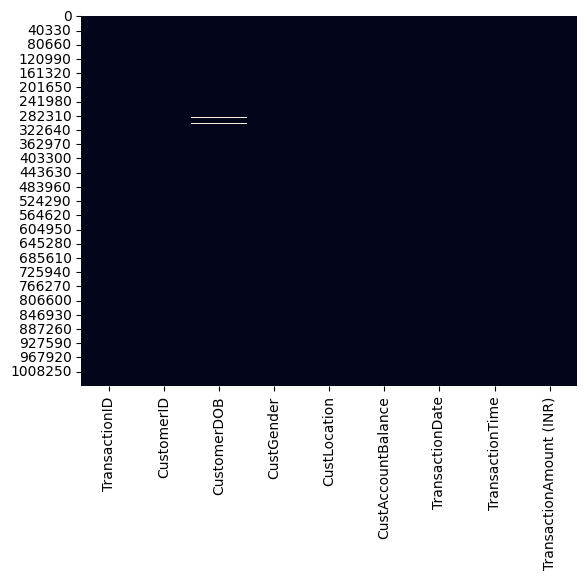

In [ ]:
sns.heatmap(bank_df.isnull(),cbar=None)

**Insights:**

The dataset contains 1048567 rows and 9 columns. There are very few null values, which are present in CustomerDOB, CustGender, CustLocation, CustAccountBalance. There are no duplicate values in the dataset.

TransactionAmount (INR),CustAccountBalance and TransactionTime are numerical type variables.TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation and TransactionDate are of object type of which CustomerDOB and TransactionDate has to be converted to Date type.

### Understanding variables

In [ ]:
bank_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [ ]:
bank_df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [ ]:
for i in bank_df.columns.tolist():
  print("No.of unique values in",i,"is:",bank_df[i].nunique())

No.of unique values in TransactionID is: 1048567
No.of unique values in CustomerID is: 884265
No.of unique values in CustomerDOB is: 17254
No.of unique values in CustGender is: 3
No.of unique values in CustLocation is: 9355
No.of unique values in CustAccountBalance is: 161328
No.of unique values in TransactionDate is: 55
No.of unique values in TransactionTime is: 81918
No.of unique values in TransactionAmount (INR) is: 93024


## **Variable Description**

**TransactionID:** A unique identifier for each transaction.

**CustomerID:** A unique identifier for each customer.

**CustomerDOB:** Date of birth of the customer.

**CustGender:** Gender of the customer (e.g., Male, Female).

**CustLocation:** Location or address of the customer.

**CustAccountBalance:** The balance in the customer's account at the time of the transaction.

**TransactionDate:** Date of the transaction.

**TransactionTime:** Time of the transaction.

**TransactionAmount (INR):** The amount involved in the transaction in Indian Rupees (INR).

### Data Wrangling

In [ ]:
columns_info = pd.DataFrame(bank_df.dtypes).rename(columns={0:'Data type'})
columns_info = pd.concat([columns_info,pd.DataFrame(bank_df.isnull().sum()).rename(columns={0:'null values count'})],axis=1)
columns_info = pd.concat([columns_info,pd.DataFrame(bank_df.isnull().sum()/len(bank_df) * 100).rename(columns={0:'null values(%)'})],axis=1).sort_values(by='null values(%)',ascending=False)
columns_info

,Data type,null values count,null values(%)
CustomerDOB,object,3397,0.323966
CustAccountBalance,float64,2369,0.225927
CustGender,object,1100,0.104905
CustLocation,object,151,0.014401
TransactionID,object,0,0.000000
CustomerID,object,0,0.000000
TransactionDate,object,0,0.000000
TransactionTime,int64,0,0.000000
TransactionAmount (INR),float64,0,0.000000


In [ ]:
bank_df = bank_df.dropna(axis=0,subset=['CustomerDOB','CustGender','CustLocation'])

In [ ]:
# converting the datatype of Transaction date and customerdob to datetime
bank_df['CustomerDOB'] = pd.to_datetime(bank_df['CustomerDOB'])
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'])

In [ ]:
bank_df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                   0
CustGender                    0
CustLocation                  0
CustAccountBalance         2368
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
bank_df.CustGender.value_counts()

M    762682
F    281299
T         1
Name: CustGender, dtype: int64

In [ ]:
bank_df.drop(bank_df[bank_df['CustGender']=='T'].index,inplace=True)

**Manipulations to the Data:**

I have dropped all the rows that contains null values in CustomerDOB, CustLoction and CustGender as we cannot impute them. I have converted the datatype of CustomerDOB, TransactionDate to datetime. I have also dropped the 'T' CustGender as there is only one record.

### Feature Engineering & Data-Preprocessing

**Handling Missing Values**

In [ ]:
bank_df['CustAccountBalance'].fillna(bank_df['CustAccountBalance'].median(),inplace=True)

In [ ]:
bank_df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

I have filled the missing values in CustAccountBalance with 'median' as there are many outliers and median is not affected by outliers.

**Handling Outliers**

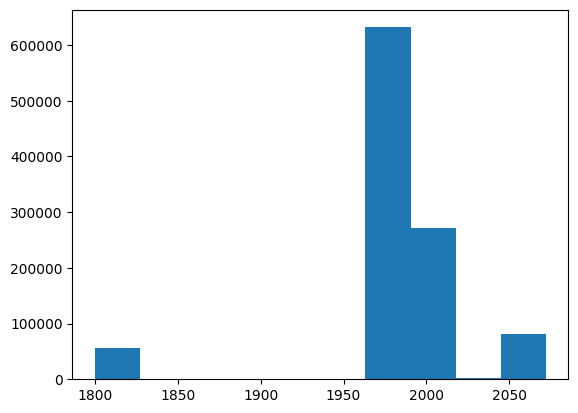

In [ ]:
# Plotting the distribution of CustomerDOB year
plt.hist(bank_df['CustomerDOB'].dt.year)
plt.show()

In [ ]:
# Removing the rows where CustomerDOB year is '1800', as it deviates significantly from remaining points.
bank_df = bank_df[~(bank_df['CustomerDOB'] == '1/1/1800')]

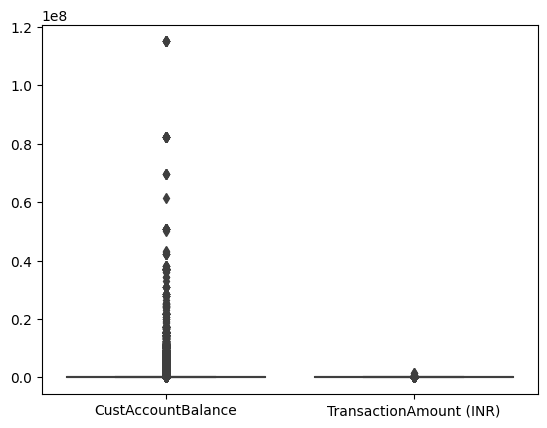

In [ ]:
sns.boxplot(data=bank_df[['CustAccountBalance','TransactionAmount (INR)']])
plt.show()

In [ ]:
z_scores_balance = np.abs(stats.zscore(bank_df['CustAccountBalance']))
threshold = 3
bank_df[z_scores_balance>threshold]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
578,T579,C7732922,2068-05-17,M,NEW DELHI,2916683.97,2016-10-21,221816,6199.00
1057,T1058,C5442656,1986-02-01,M,BOKARO,3482113.50,2016-10-21,205137,5500.00
2001,T2002,C7728829,1980-10-27,M,MUMBAI,3659161.33,2016-10-21,204521,5997.00
2159,T2160,C3131350,1986-09-11,M,MUMBAI,2834303.27,2016-10-21,210603,1273.00
3084,T3085,C9028878,1980-10-27,M,MUMBAI,3659161.33,2016-10-21,204649,2805.00
...,...,...,...,...,...,...,...,...,...
1046593,T1046594,C2610211,2060-08-20,M,BANGALORE,4911718.10,2016-09-18,72052,2500.00
1046710,T1046711,C2011291,1980-09-08,M,MUMBAI,4843746.76,2016-09-18,185735,592.20
1047436,T1047437,C6628482,1973-06-08,F,NEW DELHI,2666636.12,2016-09-18,190011,1698.01
1048086,T1048087,C8338953,1981-08-08,M,GURGAON,43165555.53,2016-09-18,90633,230.00


In [ ]:
z_scores_transaction = np.abs(stats.zscore(bank_df['TransactionAmount (INR)']))
threshold = 3
bank_df[z_scores_transaction>threshold]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
49,T50,C5242591,1982-01-12,M,BURDWAN,22525.66,2016-05-08,133136,27990.0
186,T187,C6323747,1988-10-08,M,DELHI,556731.79,2016-08-08,184232,26991.0
245,T246,C4814390,2071-01-10,F,MIRA ROAD E,78122.46,2016-10-21,150436,47290.0
246,T247,C6437438,1983-05-22,F,BHUBANESHWAR,324551.50,2016-10-21,151154,25000.0
...,...,...,...,...,...,...,...,...,...
1048238,T1048239,C1942136,2054-11-11,M,NEW DELHI,117824.74,2016-09-18,103722,20000.0
1048398,T1048399,C4126525,1978-07-24,F,AMBALA,400378.01,2016-09-18,195147,22490.0
1048421,T1048422,C5114584,1985-05-01,M,NEW DELHI,23.24,2016-09-18,82432,32500.0
1048517,T1048518,C3541869,1987-10-18,F,NEW DELHI,46245.41,2016-09-18,185632,20000.0


**Outlier handling:**

I have removed the outlieres in CustomerDOB column. I haven't removed the outliers in CustAccountBalance, TransactionAmount as the Customers with highest balance and transactions are important for bank.

**Feature Manipulation**

In [ ]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [ ]:
# creating a new column 'age' from CustomerDOB
bank_df['Age'] = bank_df.CustomerDOB.apply(age)

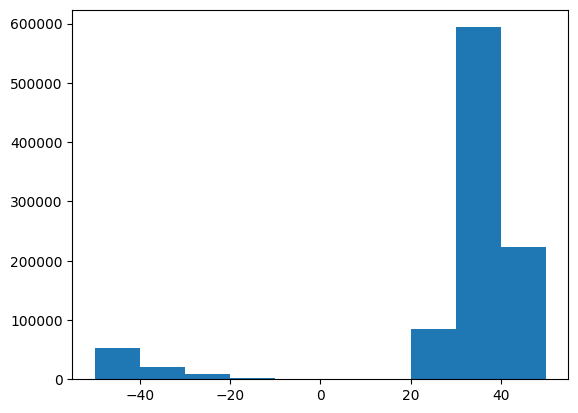

In [ ]:
plt.hist(bank_df['Age'])
plt.show()

In [ ]:
#As age cannot be negative removing those rows
bank_df = bank_df[bank_df['Age']>0]

In [ ]:
bank_df['TransactionMonth'] = bank_df['TransactionDate'].dt.month
bank_df['TransactionDay'] = bank_df['TransactionDate'].dt.dayofweek

In [ ]:
# Group by CustomerID and calculate the minimum (first transaction) and maximum (last transaction) dates
customer_dates = bank_df.groupby('CustomerID')['TransactionDate'].agg(['min', 'max']).reset_index()

# Merge the aggregated dates back to the original DataFrame
bank_df = pd.merge(bank_df, customer_dates, on='CustomerID', how='left')

In [ ]:
# Calculate Recency by subtracting the first transaction date from the last transaction date
bank_df['Recency'] = (bank_df['max'] - bank_df['min']).dt.days

In [ ]:
bank_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age', 'TransactionMonth',
       'TransactionDay', 'min', 'max', 'Recency'],
      dtype='object')

In [ ]:
# Drop intermediate columns
bank_df.drop(['min', 'max'], axis=1, inplace=True)

In [ ]:
# Calculating frequency, which is the count of transactions made by each customer
frequency = bank_df.groupby('CustomerID')['TransactionDate'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [ ]:
# Merge the frequency back to the original DataFrame
bank_df = pd.merge(bank_df, frequency, on='CustomerID', how='left')

In [ ]:
bank_df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age', 'TransactionMonth',
       'TransactionDay', 'Recency', 'Frequency'],
      dtype='object')

In [ ]:
# Dropping Unnecessary columns
bank_df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1,inplace=True)

I have created a new columns age, transaction month, transaction day of week. I have also created two new columns Recency, and Frequency which calculates time since customers last visit and number of customer transactions.

I have dropped unnecessary columns like 'TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'.

## Data Visualization

### Chart-1

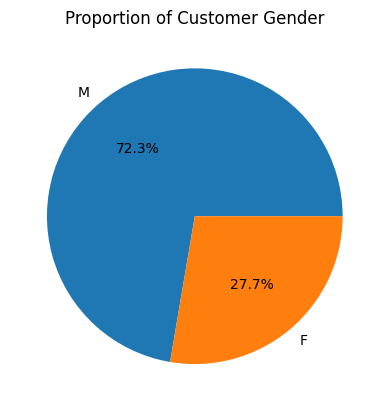

In [ ]:
gender_count = bank_df.CustGender.value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%')
plt.title("Proportion of Customer Gender")
plt.show()

This pie chart shows that, Percentage of Male customers is very high compared to Female customers.

### Chart-2

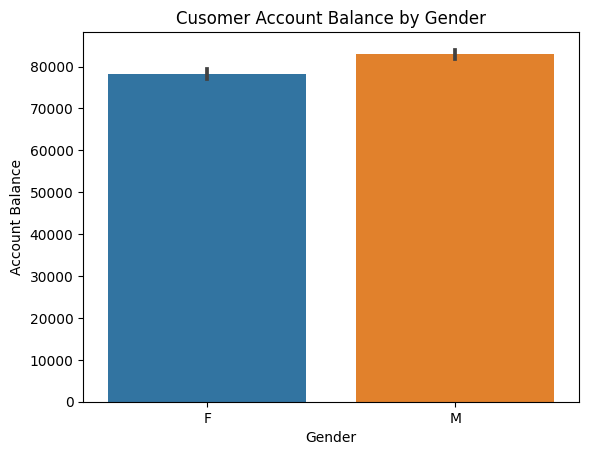

In [ ]:
sns.barplot(data=bank_df, x='CustGender', y='CustAccountBalance')
plt.xlabel("Gender")
plt.ylabel("Account Balance")
plt.title("Cusomer Account Balance by Gender")
plt.show()

This bar chart shows that, at an average male customers have marginally higher account balance compared to female customers.

### Chart-3

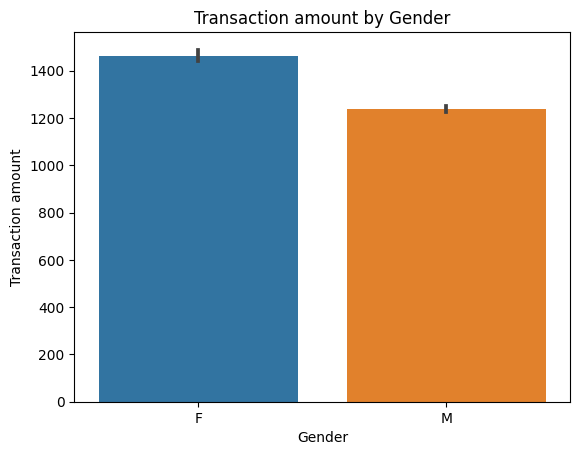

In [ ]:
sns.barplot(data=bank_df, x='CustGender', y='TransactionAmount (INR)')
plt.xlabel("Gender")
plt.ylabel("Transaction amount")
plt.title("Transaction amount by Gender")
plt.show()

This bar chart shows that, transactions made by Female customers are higher than Male customers.

### Chart-4

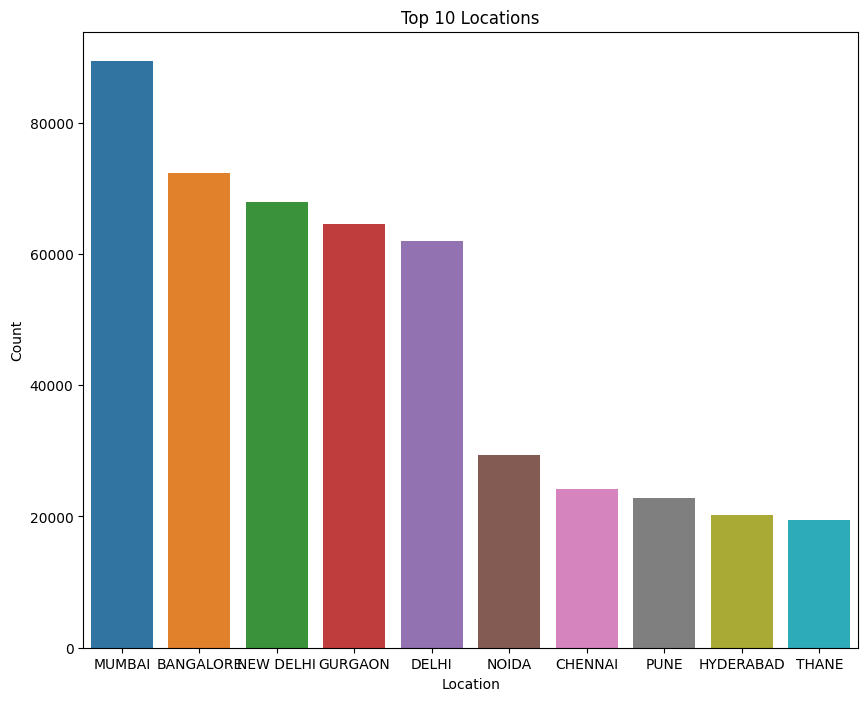

In [ ]:
Location_count = bank_df.CustLocation.value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=Location_count.index,y=Location_count.values)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Top 10 Locations")
plt.show()

This bar chart shows that, most of the customers are from Mumbai followed bby Bangalore and New Delhi.

### Chart-5

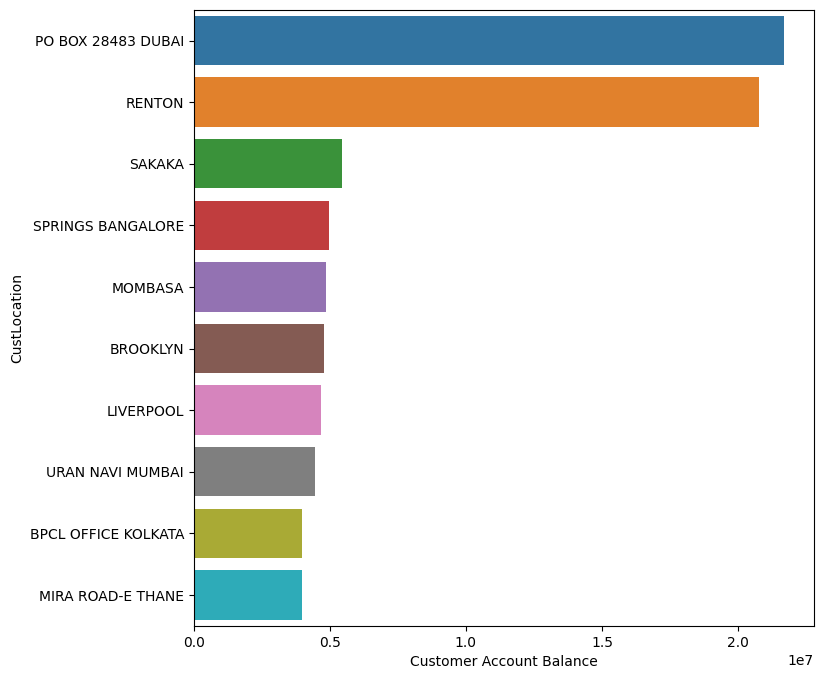

In [ ]:
plt.figure(figsize=(8,8))
location_balance = bank_df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=location_balance.index,x=location_balance.values,orient='h')
plt.xlabel("Customer Account Balance")
plt.show()

PO BOX 28483 DUBAI has highest customer account balance followed by Renton.

### Chart-6

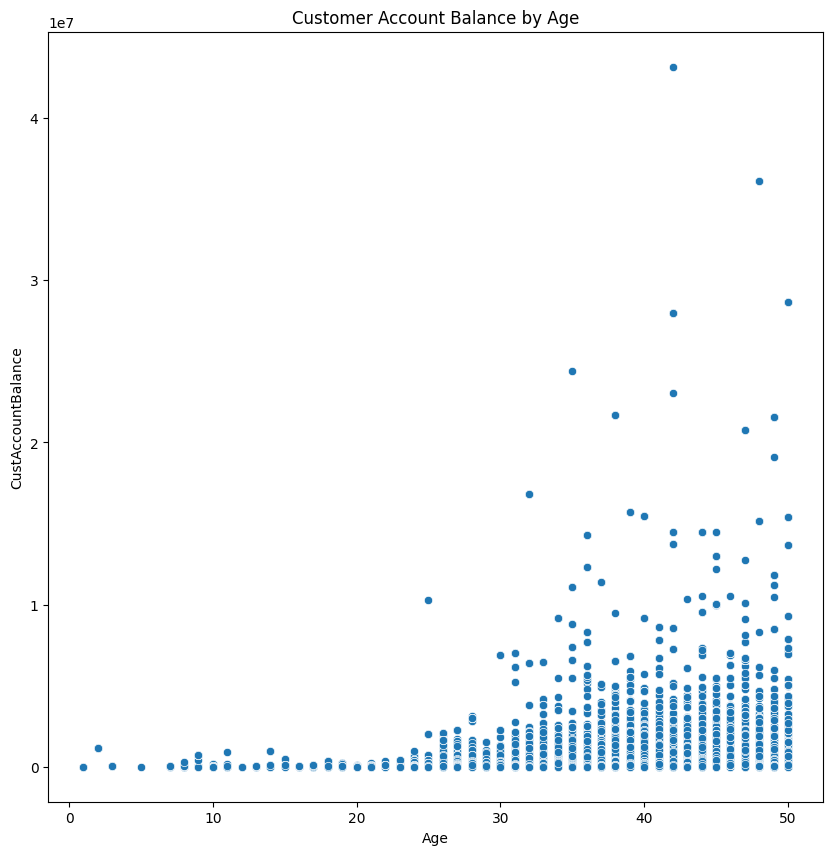

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=bank_df,x='Age', y= 'CustAccountBalance')
plt.title("Customer Account Balance by Age")
plt.show()

From the above scatterplot we can see that, from the age 20 as the age increases customer account balance increases.

### Chart-7

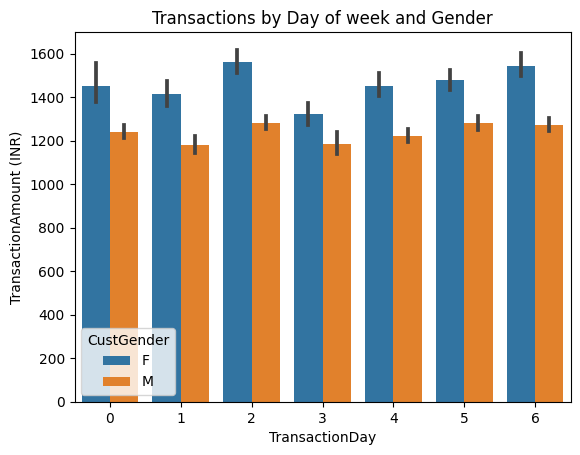

In [ ]:
sns.barplot(data=bank_df,x='TransactionDay',y='TransactionAmount (INR)',hue='CustGender')
plt.title("Transactions by Day of week and Gender")
plt.show()

From the above chart, we can see that in all days of the week female customers make higher transactions compared to male customers.

### Chart-8

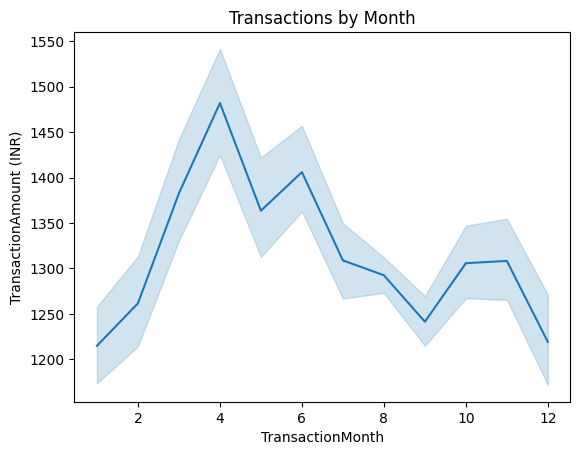

In [ ]:
sns.lineplot(data=bank_df, x='TransactionMonth',y='TransactionAmount (INR)')
plt.title("Transactions by Month")
plt.show()

This line chart shows that, from January to April transactions are gradually increasing and from June transactions are gradually decreasing.This means,highest transactions are performed during the summer season while least value transactions are made in the winter season.

### Chart-9

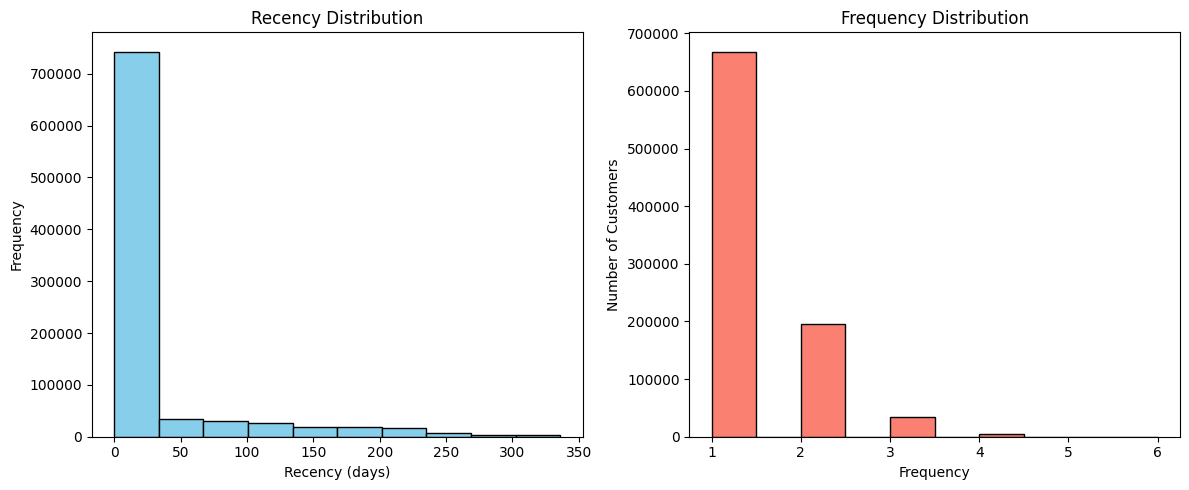

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(bank_df['Recency'], color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Frequency')

axes[1].hist(bank_df['Frequency'], color='salmon', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Number of Customers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


This histogram shows the distribution of Frequency and Recency. In Recency '0' bin has higher frequency which indicates that a substantial number of customers fall into this category, suggesting a recent and active customer base and they might be more engaged or responsive to marketing efforts.

Most of the customers made only one transactions.

### Chart-10

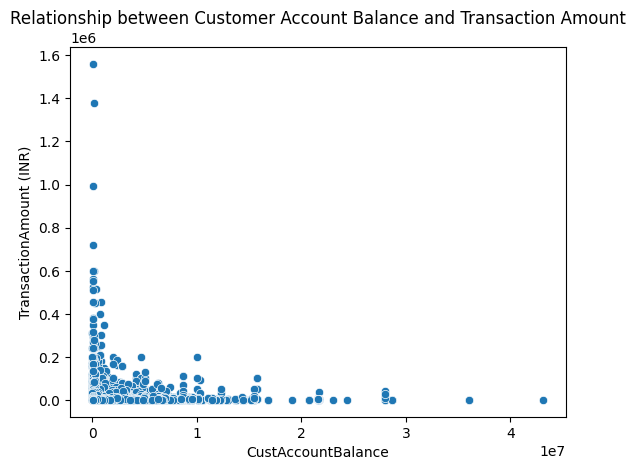

In [ ]:
sns.scatterplot(data=bank_df,x='CustAccountBalance',y='TransactionAmount (INR)')
plt.title("Relationship between Customer Account Balance and Transaction Amount")
plt.show()

This Scatterplot shows that, there is a negative correlation between CustAccountBalance and TransactionAmount.

### Chart-11 : Correlation Map

<ipython-input-66-53f7820254cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_df.corr(),annot=True,cmap='coolwarm')


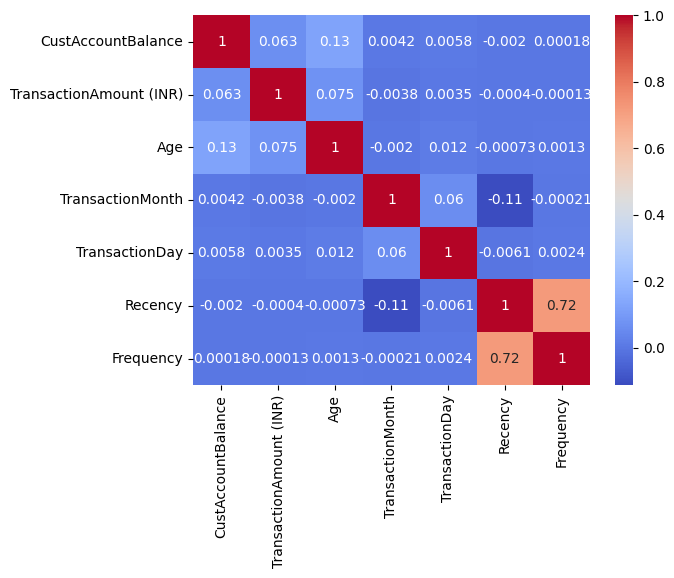

In [ ]:
sns.heatmap(bank_df.corr(),annot=True,cmap='coolwarm')
plt.show()

From the above heatmap, we can see that as the time since last transaction(Recency) increases Number of transactions by each customer(Frequency) increases.

## **Categorical Encoding**

In [ ]:
df = bank_df.copy()

In [ ]:
df.drop(columns=['CustLocation','TransactionMonth','TransactionDay'],inplace=True)

In [ ]:
df['CustGender'] = df['CustGender'].map({'M':1,'F':0})

In [ ]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency,Frequency
0,0,17819.05,25.0,29,0,1
1,0,17874.44,459.0,26,0,1
2,0,866503.21,2060.0,50,187,2
3,0,6714.43,1762.5,35,0,1
4,0,973.46,566.0,31,244,4


### **Data Scaling**

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency,Frequency
0,-1.616548,-0.160411,-0.232422,-1.252967,-0.423433,-0.544317
1,-1.616548,-0.160272,-0.153311,-1.796402,-0.423433,-0.544317
2,-1.616548,1.973578,0.138526,2.551077,2.766350,1.221137
3,-1.616548,-0.188334,0.084296,-0.166097,-0.423433,-0.544317
4,-1.616548,-0.202769,-0.133807,-0.890677,3.738636,4.752045


# **ML Model Implementation**

The data is very very big so I will use only 100000 rows

In [ ]:
df_scaled=df_scaled.sample(n=100000,random_state=42).reset_index(drop=True)
df_scaled.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency,Frequency
0,0.618602,-0.202075,-0.193231,0.739628,-0.423433,-0.544317
1,0.618602,-0.082049,-0.187763,1.826497,-0.423433,-0.544317
2,0.618602,-0.200510,-0.227865,-1.252967,-0.218741,1.221137
3,-1.616548,-0.205216,-0.218751,-1.434112,1.879351,1.221137
4,-1.616548,-0.158040,-0.182841,-0.709532,-0.423433,-0.544317


###**Dimensionality  Reduction** **- PCA**

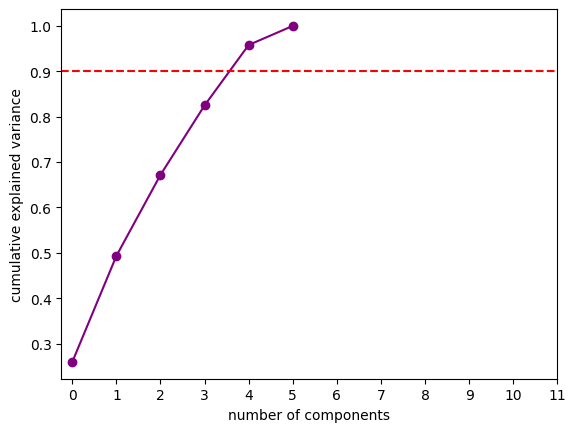

In [ ]:
# here we want to check how many component we need to explain 90%  of the variance
pca = PCA().fit(df_scaled.iloc[:,:])
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='purple',marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# x tickes
plt.xticks(np.arange(0, 12, 1))
# Draw a horizontal line at 90% explained variance
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Explained Variance')

plt.show();

In [ ]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df_scaled.iloc[:,:])

###**K-Means Clustering**

In [ ]:

inertia = []
silhouette = []


for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=42,n_init=10)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    P_score=silhouette_score(pca_data, km.labels_)
    silhouette.append(P_score)

In [ ]:
# Calculating the reconstruction error
# Reconstruct the data
X_reconstructed = pca.inverse_transform(pca_data)

# Calculate the reconstruction error (MSE)
reconstruction_error = mean_squared_error(df_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 0.19465518616082989


The reconstruction error can be used to assess the quality of dimensionality reduction.A lower reconstruction error indicates a more accurate  representation of the original data. Here we got '0.195', which is lower reconstruction error.

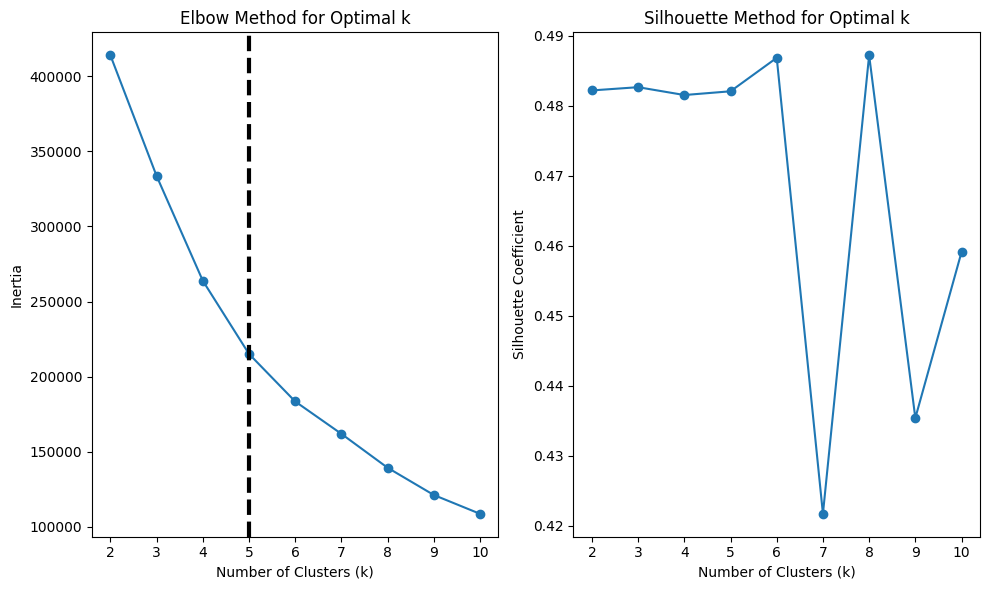

In [ ]:
# Plotting the Elbow Method (Inertia)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
# kneeLocator is used to find the optimal number of clusters in a dataset by identifying the "elbow" in the curve.
kl = KneeLocator(range(2, 11), inertia, curve='convex', direction='decreasing')
plt.plot(range(2, 11), inertia, marker='o')
plt.axvline(x=kl.elbow, color='black', label='Elbow', ls='--', linewidth=3)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Coefficients
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

The above charts suggest that, '5' is the appropriate number of clusters. Therefore,implementing k-means with 5 clusters.

In [ ]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "max_iter":300, "random_state":42}
pca_kmeans = KMeans(n_clusters=5 , **kmeans_set)
pca_kmeans.fit(pca_data)
# create a dataframe for the pca data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['label'] = pca_kmeans.labels_
pca_df.head()

,PC1,PC2,PC3,PC4,label
0,-0.680616,-0.115224,0.410642,-0.832742,2
1,-0.683443,0.096498,1.068888,-1.112530,2
2,0.711455,-0.455675,-0.605947,-0.211547,2
3,2.202842,-0.423223,-1.222279,1.722759,1
4,-0.675796,-0.326264,-0.840787,1.509052,0


<Figure size 500x500 with 0 Axes>

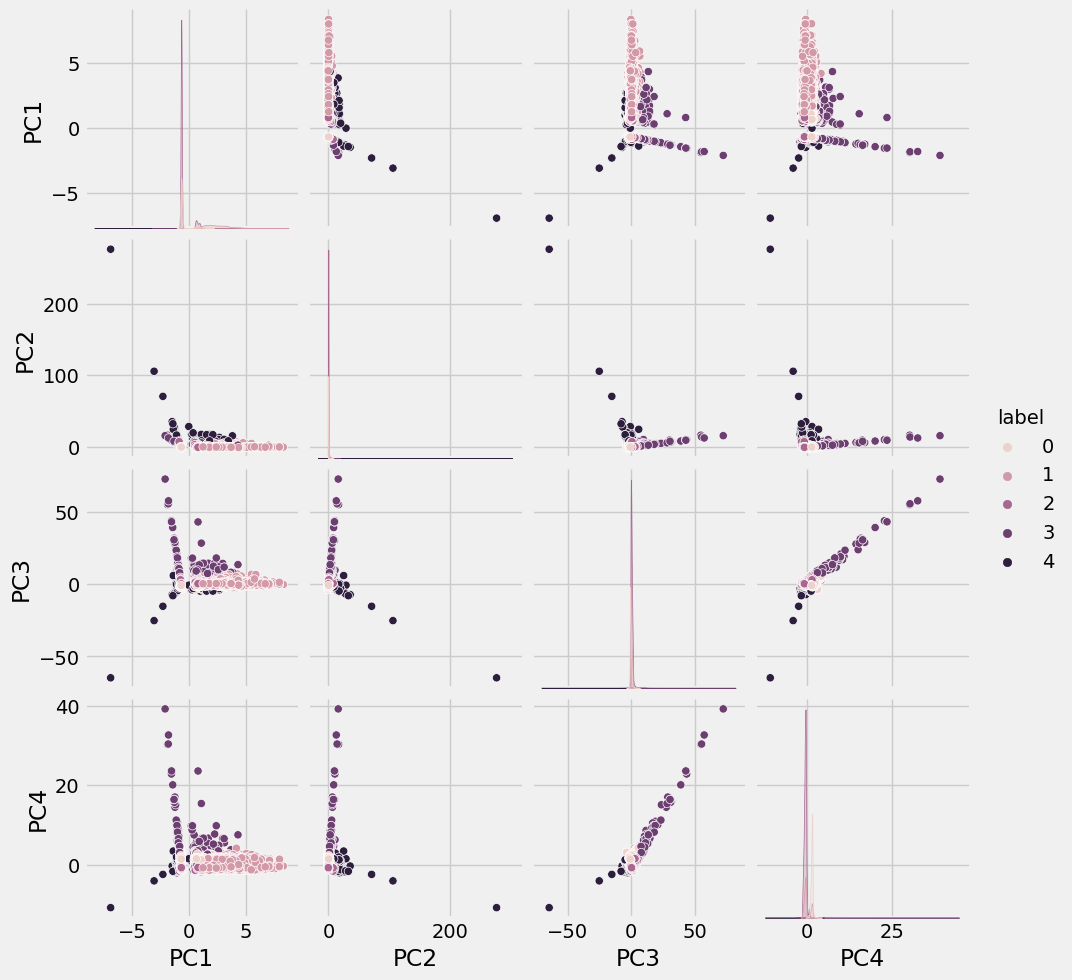

In [ ]:
sns.pairplot(pca_df,hue='label')
plt.show()

Now let's look at a couple plots to see how effective clustering was.

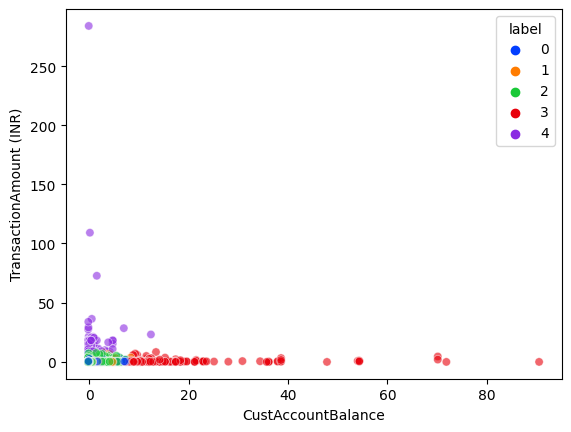

In [ ]:
sns.scatterplot(data=df_scaled, x='CustAccountBalance',y='TransactionAmount (INR)',hue=pca_df.label, alpha=0.6,palette='bright')
plt.show()

From the above plot we can see that,customers were nicely segmented.

*  Cluster '0' contains customers with less customer account balance and less transaction amount.
*   Cluster '1' contains less customer account balance and little bit transactions.

*   Cluster '2' contains customers with medium customer account balance and medium transactions.
*   Cluster '3' contains customers with high transaction amount


*   Cluster '4' contains customers with high customer account balance.


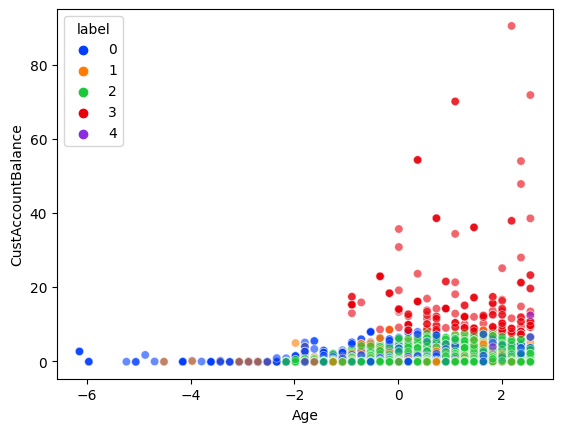

In [ ]:
sns.scatterplot(data=df_scaled, x='Age',y='CustAccountBalance',hue=pca_df.label, alpha=0.6,palette='bright')
plt.show()

From this plot also we can see that,

*   Cluster '0' contains customers with less customer account balance.
*   Cluster '1' contains customers with high age and less customer balance.


*   Cluster '2' contains customers with Average customer account balance.

*   Cluster '3' contains customers with high customer account balance.


##Conclusion
###EDA

*   There are more number of Male customers compared to female customers.
*   Male customers has highest customer account balance compared to females, but female customers make higher transactions.

*   Most of the customers are  from Mumbai, Bangalore, New Delhi and Gurgaon.
*   As the age increases customer account balance increases from 21 years of age.

*   There are high transactions in the months of January, Febrauary, March, April and from June transactions are gradually decreasing.
*   As the Customer Account balance increases Transaction amount decreases.

###ML Model

*   I have used the K-means Clustering algorithm with 5 clusters.
*   I have used Silhouette score and Elbow technique to assess the performance of clustering algorithm.


*   I have used PCA with '4' components to reduce the dimensionality of the data.
*   PCA with '4' components also has lower reconstruction error, which indicates the accurate representation of the original data.

###Customer Segmentation


*   Customers with lower customer balance are segmented into one cluster.
*   Customers with higher transaction amount are segmented into one cluster.


*   Customers with higher customer account balance are segmented into one cluster.
*   Customer with higher age and average account balance are segmented into one cluster.

Insights found from the above can guide Banks to implement effective stratagies, such as offering loans or credit cards to the customers with higher transactions and account balance.











